In [1]:
# Survey Data cleaning

# SHED 2022

import pandas as pd
import numpy as np

# Survey data cleaning and analysis
# Made this a seperate file because I didn't want to have to import the files everytime

# SHED 2022, https://www.federalreserve.gov/consumerscommunities/shed_data.htm

columns_to_use = ["CaseID", "weight_pop", "B2", "D1A", "I39", "I40", "I9", "EF1", "EF2", "EF3_h", "EF5A", 
                  "EF7", "K20", "ppeduc5", "ppeducat", "ppemploy", "ppfs0596", "INF2_a", "INF2_b" , "INF2_c", "INF2_d", "INF2_e", 
                  "INF2_f", "INF3_a", "INF3_b", "INF3_c", "INF3_d", "INF3_e", "INF3_f", "INF3_g", "pphhsize", "BK1", "E2B", "ppfs1482", "I20", "I21_a", "atleast_okay"]

# Change input path to whatever it is on your machine
df = pd.read_excel(r"C:\Users\...\Carbon_Dividend_Analysis\Data\SHED_2022.xlsx", usecols=columns_to_use, index_col='CaseID')

display(df)

,weight_pop,B2,D1A,BK1,K20,I39,I40,I9,I20,I21_a,...,EF5A,EF7,E2B,ppeduc5,ppeducat,ppemploy,pphhsize,ppfs0596,ppfs1482,atleast_okay
CaseID,,,,,,,,,,,,,,,,,,,,,
1,12033.6823,Doing okay,Yes,Yes,"$25,000 to $49,999",9000,"$5,000 to $14,999",Varies quite often from month to month,Less than your income,Increased,...,Able to pay all bills,"$2,000 or more",No,Masterâ€™s degree or higher,Bachelor's degree or higher,Working part-time,1,"Under $50,000",Excellent,Yes
2,21579.2115,Living comfortably,No,Yes,"$500,000 to $999,999",180000,"$150,000 to $199,999",Roughly the same amount each month,Less than your income,About the same,...,Able to pay all bills,"$2,000 or more",No,Masterâ€™s degree or higher,Bachelor's degree or higher,Not working,1,"$250,000 - $499,999",Good,Yes
3,20043.8925,Just getting by,Yes,Yes,"$50,000 to $99,999",125000,"$100,000 to $149,999",Occasionally varies from month to month,Less than your income,About the same,...,Canâ€™t pay some bills,$500 to $999,No,Some college or Associate's degree,Some college or Associate's degree,Working full-time,3,"$100,000 - $249,999",Excellent,No
4,21793.3678,Living comfortably,No,Yes,"$250,000 to $499,999",80000,"$75,000 to $99,999",Varies quite often from month to month,Less than your income,Decreased,...,Able to pay all bills,"$2,000 or more",No,Masterâ€™s degree or higher,Bachelor's degree or higher,Not working,1,"$500,000 - $999,999",Excellent,Yes
5,13900.4068,Living comfortably,No,Yes,"$500,000 to $999,999",45000,"$40,000 to $49,999",Occasionally varies from month to month,More than your income,Decreased,...,Canâ€™t pay some bills,"$1,000 to $1,999",Yes,Masterâ€™s degree or higher,Bachelor's degree or higher,Working part-time,1,"$100,000 - $249,999",Excellent,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11771,22438.3553,Living comfortably,Yes,Yes,"Less than $10,000",100000,"$100,000 to $149,999",Roughly the same amount each month,Less than your income,Increased,...,Able to pay all bills,"$1,000 to $1,999",No,Bachelor's degree,Bachelor's degree or higher,Working full-time,2,NaN,NaN,Yes
11772,27808.1160,Just getting by,Yes,Yes,Donâ€™t know,80000,"$75,000 to $99,999",Roughly the same amount each month,The same as your income,Increased,...,Canâ€™t pay some bills,$100 to $499,No,Some college or Associate's degree,Some college or Associate's degree,Working full-time,3,NaN,NaN,No
11773,22146.0361,Doing okay,Yes,Yes,Donâ€™t know,125000,"$100,000 to $149,999",Occasionally varies from month to month,Less than your income,Decreased,...,Able to pay all bills,"$2,000 or more",No,Bachelor's degree,Bachelor's degree or higher,Working part-time,5,"$100,000 - $249,999",Good,Yes


In [2]:
# Handling an incorrect encoding

corrections = {
    r"â€™": "'",  # Correcting apostrophes
}

for column in df.select_dtypes(include=['object']):  
    for pattern, replacement in corrections.items():
        df[column] = df[column].str.replace(pattern, replacement, regex=True)

In [3]:
# Data Wrangling

# I40
df["I40"].fillna("$0", inplace=True)

# EF2
df.rename(columns={"EF1": "3_month_expense_coverage"}, inplace=True)
df.loc[(df["3_month_expense_coverage"] == 'No') & (df["EF2"] == 'Yes'), "3_month_expense_coverage"] = "Yes"
df.drop('EF2', axis=1, inplace=True)
# Looks good

#K20
# Categorize missing values in "K20" as "Not sure"
df["K20"].fillna("Don't know", inplace=True)
# Preserves the purity of the data, imputing means/medians could increase error

# PPFS0596
# Categorize missing values in "ppfs0596" as "Not sure"
df["ppfs0596"].fillna("Don't know", inplace=True)
# Preserves the purity of the data, imputing means/medians could increase error

# INF2... & INF3...
price_inc_columns = [
    "INF2_a", "INF2_b", "INF2_c", "INF2_d", "INF2_e", "INF2_f", 
    "INF3_a", "INF3_b", "INF3_c", "INF3_d", "INF3_e", "INF3_f", "INF3_g"]

df["yes_count"] = df[price_inc_columns].apply(lambda x: x.str.contains("Yes").sum(), axis=1)

df["affect_of_price_inc"] = "not affected"  
df.loc[df["yes_count"] >= 10, "affect_of_price_inc"] = "extremely affected"
df.loc[(df["yes_count"] >= 5) & (df["yes_count"] <= 9), "affect_of_price_inc"] = "very affected"
df.loc[(df["yes_count"] >= 1) & (df["yes_count"] <= 4), "affect_of_price_inc"] = "somewhat affected"

df.drop(columns="yes_count", inplace=True)
df.drop(columns=price_inc_columns, inplace=True)

In [4]:
#Drop people who chose to not show their income
indices_to_drop = df[(df['I39'] == 0) & ((df['ppemploy'] == 'Working full-time') | (df['ppemploy'] == 'Working part-time'))].index
df.drop(indices_to_drop, inplace=True)

In [5]:
df["per_person_income"] = df["I39"] / np.sqrt(df["pphhsize"])
labels = range(1, 11)
df["decile"] = pd.qcut(df["per_person_income"], 10, labels=labels)
df["decile"]

CaseID
1         2
2        10
3         8
4         8
5         6
         ..
11771     7
11772     6
11773     7
11774     8
11775     1
Name: decile, Length: 11215, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

In [6]:
df["per_person_income"].describe()

count    1.121500e+04
mean     6.016854e+04
std      7.505620e+04
min      0.000000e+00
25%      1.758883e+04
50%      4.250000e+04
75%      8.049845e+04
max      1.414213e+06
Name: per_person_income, dtype: float64

In [7]:
print(6.016854e+04)

60168.54


In [8]:
df["per_person_income"].median()

42500.0

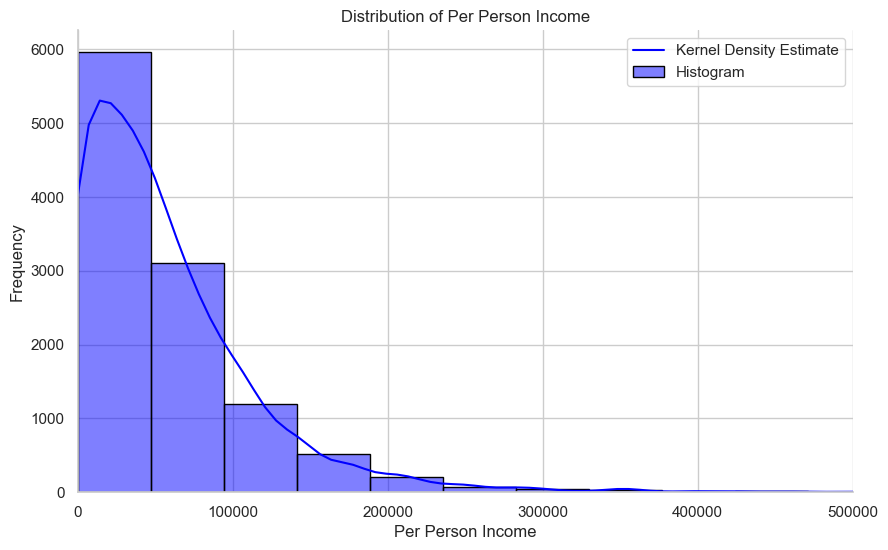

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['per_person_income'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Per Person Income')
plt.xlabel('Per Person Income')
plt.ylabel('Frequency')
plt.xlim(0, 500000)
plt.legend(labels=['Kernel Density Estimate', 'Histogram'])
plt.grid(True)
sns.despine()
plt.show()

In [10]:
# Index is on a scale of 0-1.

df["FSRI Score"] = 0.00

In [11]:
# B2: Overall, which one of the following best describes how well you are managing financially these days?

response_to_score_B2 = {
    "Finding it difficult to get by": 0.0,
    "Just getting by": 0.025,
    "Doing okay": 0.05,
    "Living comfortably": 0.075
}

df["response_to_score_B2"] = df["B2"].map(response_to_score_B2)

In [12]:
# D1A: Last month, did you do any work for either pay or profit?

response_to_score_D1A = {
    "No": 0.0,
    "Yes": 0.075
}

df["response_to_score_D1A"] = df["D1A"].map(response_to_score_D1A)

In [13]:
# K20: Approximately how much money do you currently have saved for retirement?

response_to_score_K20 = {
    "Don't know" : 0.0,
    "Less than $10,000" : 0.009375,
    "$10,000 to $24,999" : 0.01875,
    "$25,000 to $49,999" : 0.028125,
    "$50,000 to $99,999" : 0.0375,
    "$100,000 to $249,999" : 0.046875,
    "$250,000 to $499,999" : 0.05625,
    "$500,000 to $999,999" : 0.065625,
    "Over $1,000,000": 0.075
}

df["response_to_score_K20"] = df["K20"].map(response_to_score_K20)

In [14]:
# I40: Which of the following categories best describes the total income that you (and/or your spouse or partner) received from all sources, before taxes and deductions, in the past 12 months?

response_to_score_I40 = {
    "$0" : 0.0,
    "$1 to $4,999" : 0.015,
    "$5,000 to $14,999" : 0.03,
    "$15,000 to $24,999": 0.045,
    "$25,000 to $39,999" : 0.06,
    "$40,000 to $49,999" : 0.075,
    "$50,000 to $74,999" : 0.09,
    "$75,000 to $99,999"  : 0.105,
    "$100,000 to $149,999" : 0.12,
    "$150,000 to $199,999" : 0.135,
    "$200,000 or higher": 0.15
}

df["response_to_score_I40"] = df["I40"].map(response_to_score_I40)
df["response_to_score_I40"].fillna(0.0, inplace=True)

In [15]:
#I9: In the past 12 months, which one of the following best describes your (and/or your spouse's or partner's) income?

response_to_score_I9 = {
    "Roughly the same amount each month": 0.025,
    "Occasionally varies from month to month": 0.0125,
    "Varies quite often from month to month" : 0.0
}

df["response_to_score_I9"] = df["I9"].map(response_to_score_I9)

In [16]:
#3_month_expense_coverage: are you able to cover 3 months of expenses in case of emergency

response_to_score_3_month_expense_coverage = {
    "No": 0.0,
    "Yes": 0.075
}


df["response_to_score_3_month_expense_coverage"] = df["3_month_expense_coverage"].map(response_to_score_3_month_expense_coverage)

In [17]:
#EF3_h: I wouldn’t be able to pay for the expense right now - Suppose that you have an emergency expense that costs ($400/$500). Based on your current financial situation, how would you pay for this expense?


response_to_score_EF3_h = {
    "I wouldn’t be able to pay for the expense right now": 0.00,
    "No": 0.075
}

df["response_to_score_EF3_h"] = df["EF3_h"].map(response_to_score_EF3_h)
df["response_to_score_EF3_h"].fillna(0.0, inplace=True)

In [18]:
#EF5A: Which best describes your ability to pay all of your bills in full this month?

response_to_score_EF5A = {
    "Can’t pay some bills": 0.00,
    "Able to pay all bills": 0.075
}

df["response_to_score_EF5A"] = df["EF5A"].map(response_to_score_EF5A)
df["response_to_score_EF5A"].fillna(0.0, inplace=True)

In [19]:
#EF7: Based on your current financial situation, what is the largest emergency expense that you could handle right now using only your savings?

response_to_score_EF7 = {
    "Under $100" : 0.00,
    "$100 to $499" : 0.01875,
    "$500 to $999" : 0.0375,
    "$1,000 to $1,999": 0.05625,
    "$2,000 or more" : 0.075
}

df["response_to_score_EF7"] = df["EF7"].map(response_to_score_EF7)

In [20]:
#ppeduc5 - Education (5 Categories)

response_to_score_ppeduc5 = {
    "No high school diploma or GED" : 0.00,
    "High school graduate (high school diploma or the equivalent GED)" : 0.01875,
    "Some college or Associate's degree" : 0.0375,
    "Bachelor's degree": 0.05625,
    "Master's degree or higher" : 0.075
}

df["response_to_score_ppeduc5"] = df["ppeduc5"].map(response_to_score_ppeduc5)

In [21]:
#ppemploy - employment status

response_to_score_ppemploy = {
    "Not working": 0.00,
    "Working part-time": 0.0375,
    "Working full-time" : 0.075
}

df["response_to_score_ppemploy"] = df["ppemploy"].map(response_to_score_ppemploy)

In [22]:
#ppfs0596:  What is the approximate total amount of your household's savings and investments?

response_to_score_ppfs0596 = {
    "Don't know" : 0.00,
    "Not sure" : 0.00,
    "Under $50,000" : 0.0125,
    "$50,000 - $99,999" : 0.025,
    "$100,000 - $249,999": 0.0375,
    "$250,000 - $499,999" : 0.05,
    "$500,000 - $999,999" : 0.0625,
    "$1,000,000 or more" : 0.075
}

df["response_to_score_ppfs0596"] = df["ppfs0596"].map(response_to_score_ppfs0596)

In [23]:
#affect_of_price_inc - Affect of price increases

response_to_score_affect_of_price_inc = {
    "extremely affected": 0.00,
    "very affected": 0.025,
    "somewhat affected": 0.05,
    "not affected": 0.075
}

df["response_to_score_affect_of_price_inc"] = df["affect_of_price_inc"].map(response_to_score_affect_of_price_inc)

In [24]:
# Let's sum the columns into a total index score
score_columns = ["response_to_score_B2", "response_to_score_K20", "response_to_score_D1A",
                 "response_to_score_I40", "response_to_score_I9", "response_to_score_3_month_expense_coverage",
                 "response_to_score_EF3_h","response_to_score_EF5A","response_to_score_EF7", "response_to_score_ppemploy",
                 "response_to_score_ppeduc5", "response_to_score_ppfs0596", "response_to_score_affect_of_price_inc"]
df['FSRI Score'] = df[score_columns].sum(axis=1)
df.drop(columns=score_columns, inplace=True)

In [25]:
# Generating a sheet with the cleaned data so I don't have to keep loading in the entire survey

# Change output path to whatever you want it to be on your machine
output_file_path = r"C:\Users\...\Carbon_Dividend_Analysis\Data\SHED_2022_Cleaned.xlsx"
df.to_excel(output_file_path, sheet_name='Cleaned Data')